# Классификация

Для задачи классификации был выбран Car Evaluation Data Set, так как он не только имеет необходимые данные для проведения исследований, но и может быть использован в реальных сценариях разработки рекомендационных систем для автосалонов и платформ по продаже автомобилей. Ссылка на датасет: https://archive.ics.uci.edu/dataset/19/car+evaluation.

Для классификации выбраны следующие метрики:

*   **Accuracy** - подходит для сбалансированных данных, где важно количество правильных предсказаний в общей выборке.
*   **F1-Score** - использована для оценки качества классификации в условиях несбалансированных классов


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import pandas as pd

data_classification = pd.read_csv("car_evaluation.csv")
data_classification.columns = ['Buying', 'Maint', 'Doors','Persons','LugBoot','Safety','Evaluation']
data_classification.sample(10)

,Buying,Maint,Doors,Persons,LugBoot,Safety,Evaluation
888,med,vhigh,2,more,big,med,acc
235,vhigh,med,2,more,small,high,unacc
543,high,high,2,2,med,med,unacc
475,high,vhigh,3,4,big,high,unacc
606,high,high,4,4,med,med,acc
1469,low,high,4,4,med,low,unacc
274,vhigh,med,4,2,med,high,unacc
1598,low,med,5more,2,big,low,unacc
1198,med,low,2,4,small,high,good
1208,med,low,2,more,med,low,unacc


In [ ]:
x=data_classification.drop('Evaluation',axis=1)
x_dummy=pd.get_dummies(x).astype('int')
y=data_classification['Evaluation']

x_train, x_test, y_train, y_test = train_test_split(x_dummy, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

knc = KNeighborsClassifier(n_neighbors = 5)
knc.fit(x_train, y_train)

log_reg = LogisticRegression(random_state=1)
log_reg.fit(x_train, y_train)

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

tree = DecisionTreeClassifier(random_state=1)
tree.fit(x_train, y_train)

random_forest = RandomForestClassifier(random_state=1, n_estimators=100)
random_forest.fit(x_train, y_train)

gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(x_train, y_train)

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score

def print_metrics(model_name, model, x_train, y_train, x_test, y_test, y_pred):
    print(f"{model_name}:")
    print(f"  Training Accuracy: {model.score(x_train, y_train):.6f}")
    print(f"  Testing Accuracy: {accuracy_score(y_test, y_pred):.6f}")
    print(f"  F1-score: {f1_score(y_test, y_pred, average='weighted'):.6f}")
    print()

y_pred_knn = knc.predict(x_test)
print_metrics("K-Nearest Neighbors", knc, x_train, y_train, x_test, y_test, y_pred_knn)

y_pred_log = log_reg.predict(x_test)
print_metrics("Logistic Regression", log_reg, x_train, y_train, x_test, y_test, y_pred_log)

y_pred_lin = lin_reg.predict(x_test)
y_pred_lin_class = np.rint(y_pred_lin).astype(int)
print_metrics("Linear Regression", lin_reg, x_train, y_train, x_test, y_test, y_pred_lin_class)

y_pred_tree = tree.predict(x_test)
print_metrics("Decision Tree", tree, x_train, y_train, x_test, y_test, y_pred_tree)

y_pred_forest = random_forest.predict(x_test)
print_metrics("Random Forest", random_forest, x_train, y_train, x_test, y_test, y_pred_forest)

y_pred_gbc = gbc.predict(x_test)
print_metrics("Gradient Boosting", gbc, x_train, y_train, x_test, y_test, y_pred_gbc)


K-Nearest Neighbors:
  Training Accuracy: 0.958301
  Testing Accuracy: 0.884259
  F1-score: 0.878878

Logistic Regression:
  Training Accuracy: 0.699614
  Testing Accuracy: 0.662037
  F1-score: 0.607724

Linear Regression:
  Training Accuracy: 0.107850
  Testing Accuracy: 0.462963
  F1-score: 0.492148

Decision Tree:
  Training Accuracy: 1.000000
  Testing Accuracy: 0.967593
  F1-score: 0.967956

Random Forest:
  Training Accuracy: 1.000000
  Testing Accuracy: 0.951389
  F1-score: 0.951698

Gradient Boosting:
  Training Accuracy: 0.993050
  Testing Accuracy: 0.969907
  F1-score: 0.970428



## Улучшение бейзлайна
Выполним:
*   препроцессинг данных
*   визуализацию данных
*   подбор гиперпараметров






In [ ]:
data_classification.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Buying      1727 non-null   object
 1   Maint       1727 non-null   object
 2   Doors       1727 non-null   object
 3   Persons     1727 non-null   object
 4   LugBoot     1727 non-null   object
 5   Safety      1727 non-null   object
 6   Evaluation  1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [ ]:
data_classification.describe().T.style.background_gradient(cmap='Greens')

,count,unique,top,freq
Buying,1727,4,high,432
Maint,1727,4,high,432
Doors,1727,4,3,432
Persons,1727,3,4,576
LugBoot,1727,3,med,576
Safety,1727,3,med,576
Evaluation,1727,4,unacc,1209


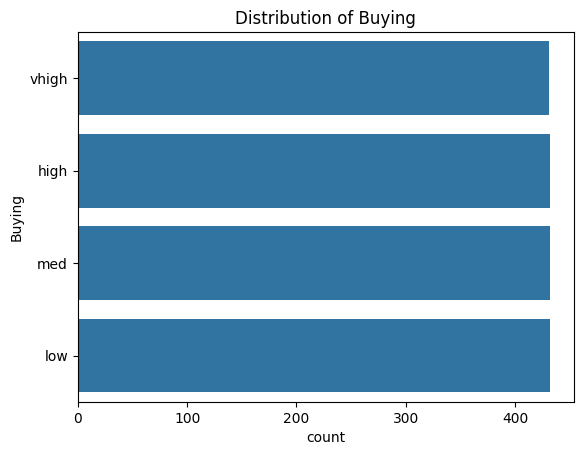

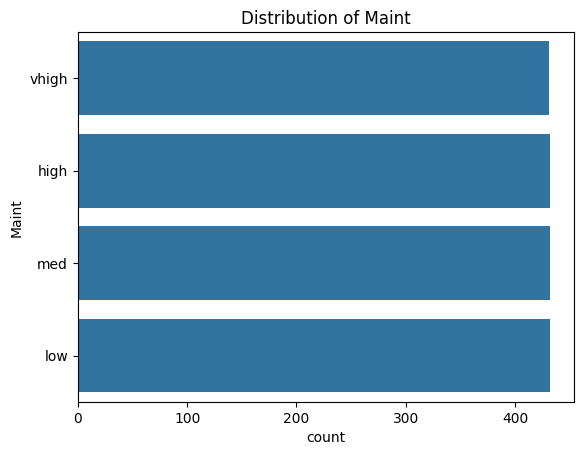

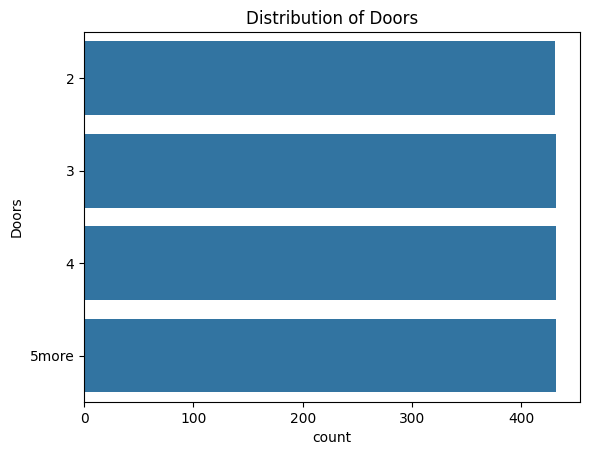

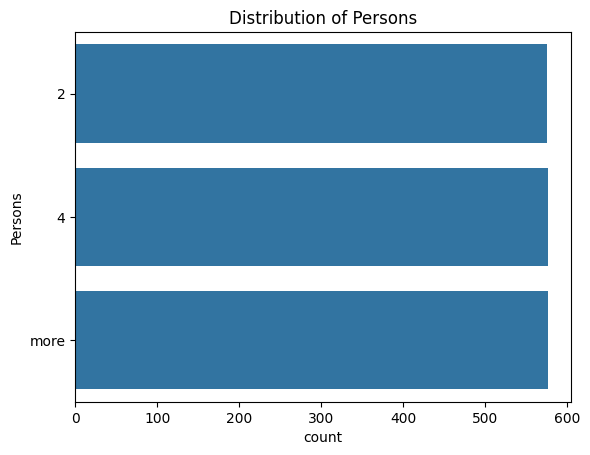

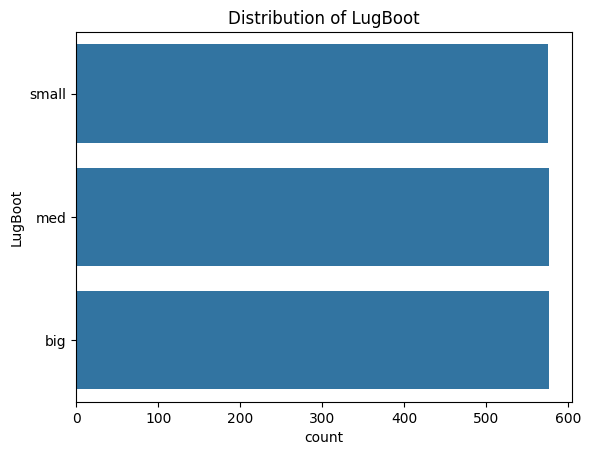

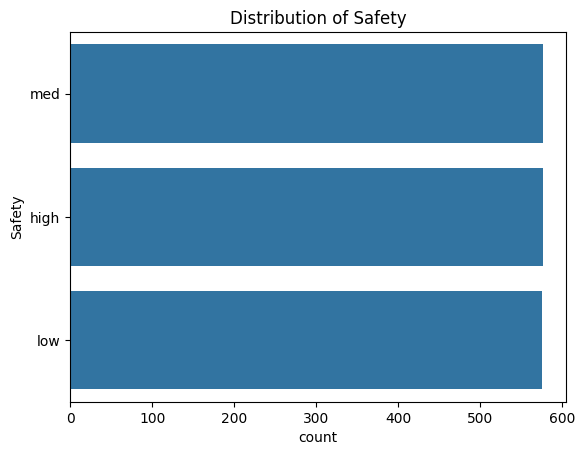

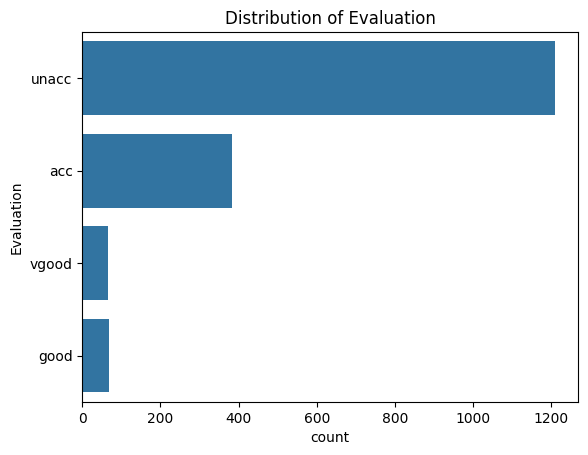

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_bar(d,i):
    plt.subplot(1,1,1)
    sns.countplot(d[i])
    plt.title(f"Distribution of {i}")
    plt.show()
for i in data_classification.columns:
    plot_bar(data_classification,i)

In [ ]:
li = list(data_classification.columns)
labelencoder = LabelEncoder()
for i in li:
    data_classification[i] = labelencoder.fit_transform(data_classification[i])
data_classification.head()

,Buying,Maint,Doors,Persons,LugBoot,Safety,Evaluation
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2


In [ ]:
x = data_classification.iloc[:,:-1]
y = data_classification.iloc[:,-1]
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.25, random_state = 1)

Произведем подбор гиперпараметров

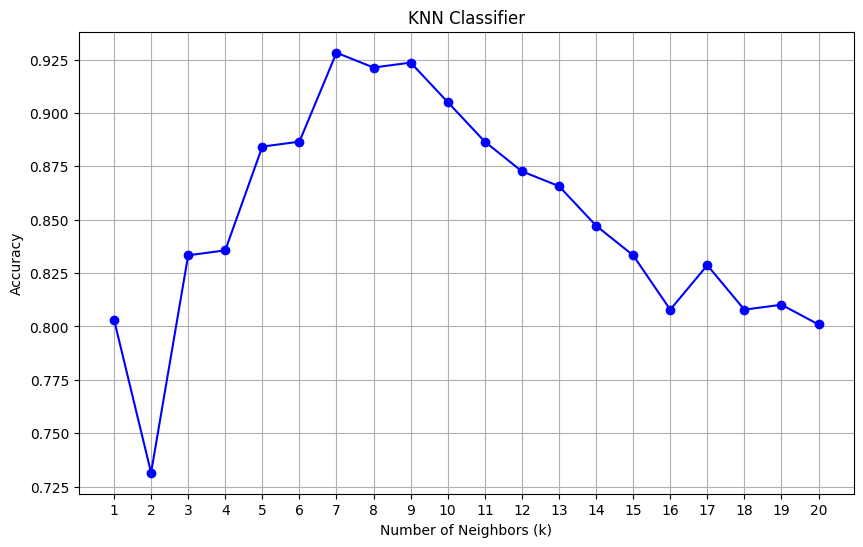

In [ ]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

k_values = range(1, 21)
accuracy_scores = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-', color='b')
plt.title('KNN Classifier')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid()
plt.show()


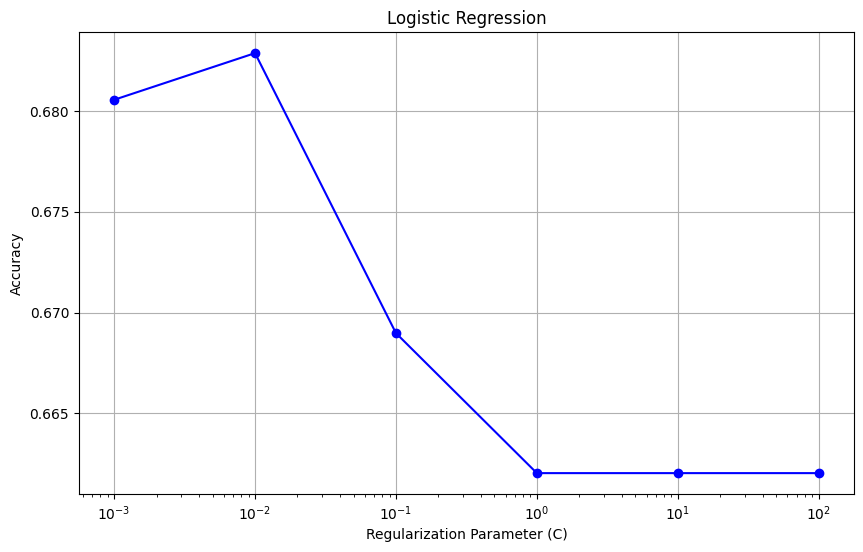

In [ ]:
C_values = [0.001, 0.01, 0.1, 1, 10, 100]
accuracy_scores_log_reg = []

for C in C_values:
    log_reg = LogisticRegression(C=C, max_iter=10000)
    log_reg.fit(x_train, y_train)
    y_pred = log_reg.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores_log_reg.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(C_values, accuracy_scores_log_reg, marker='o', linestyle='-', color='b')
plt.title('Logistic Regression')
plt.xlabel('Regularization Parameter (C)')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.grid()
plt.show()



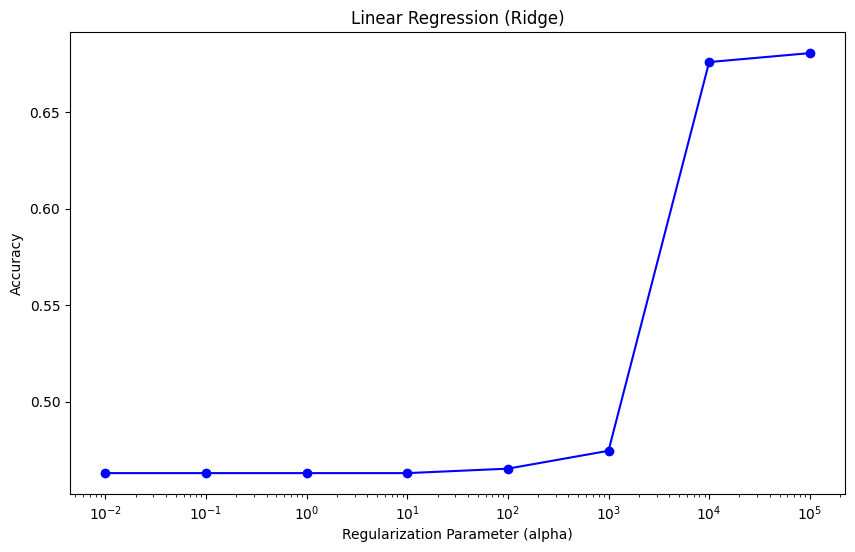

In [ ]:
from sklearn.linear_model import Ridge

alpha_values = [0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]
accuracy_scores_lin_reg = []

for alpha in alpha_values:
    lin_reg = Ridge(alpha=alpha)
    lin_reg.fit(x_train, y_train)
    y_pred = lin_reg.predict(x_test)
    y_pred_class = np.rint(y_pred).astype(int)
    accuracy = accuracy_score(y_test, y_pred_class)
    accuracy_scores_lin_reg.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(alpha_values, accuracy_scores_lin_reg, marker='o', linestyle='-', color='b')
plt.title('Linear Regression (Ridge)')
plt.xlabel('Regularization Parameter (alpha)')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.show()

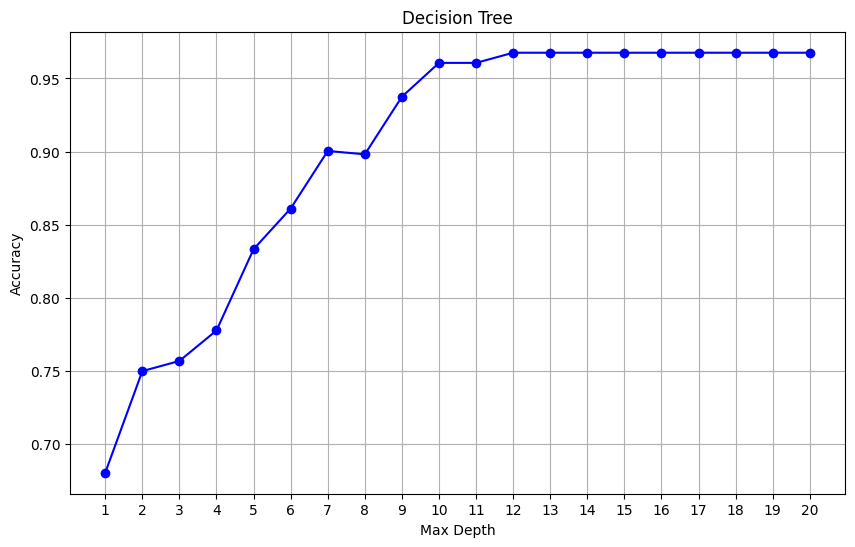

In [ ]:
max_depth_values = range(1, 21)
accuracy_scores_tree = []

for max_depth in max_depth_values:
    tree = DecisionTreeClassifier(max_depth=max_depth)
    tree.fit(x_train, y_train)
    y_pred = tree.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores_tree.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, accuracy_scores_tree, marker='o', linestyle='-', color='b')
plt.title('Decision Tree')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.xticks(max_depth_values)
plt.grid()
plt.show()


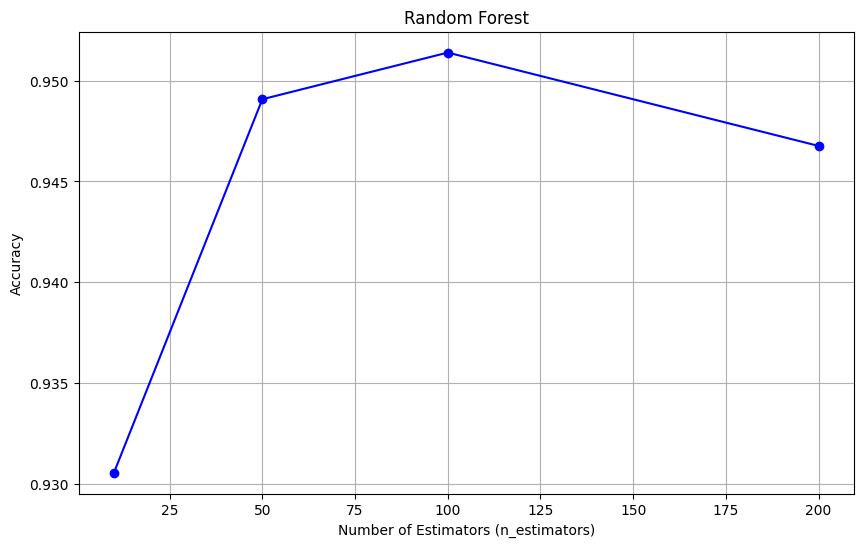

In [ ]:
n_estimators_values = [10, 50, 100, 200]
accuracy_scores_forest = []

for n_estimators in n_estimators_values:
    forest = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    forest.fit(x_train, y_train)
    y_pred = forest.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores_forest.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, accuracy_scores_forest, marker='o', linestyle='-', color='b')
plt.title('Random Forest')
plt.xlabel('Number of Estimators (n_estimators)')
plt.ylabel('Accuracy')
plt.grid()
plt.show()


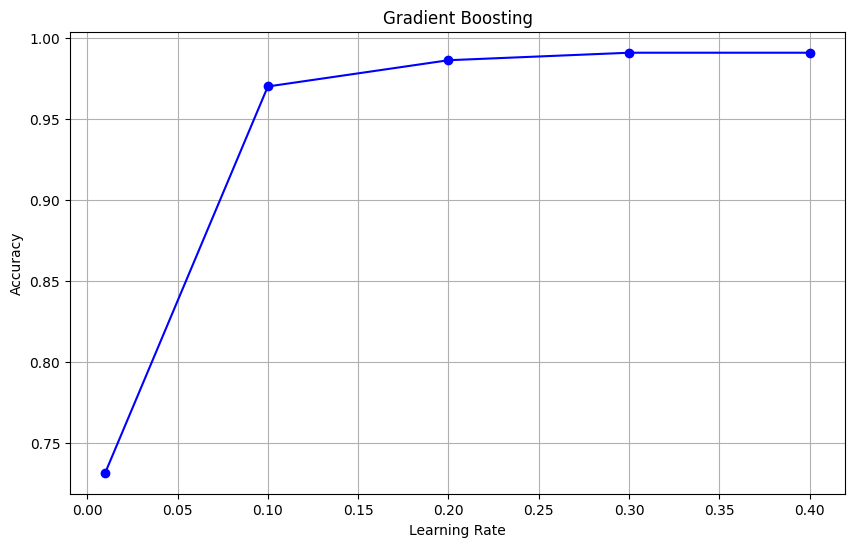

In [ ]:
learning_rate_values = [0.01, 0.1, 0.2, 0.3, 0.4]
accuracy_scores_gbc = []

for learning_rate in learning_rate_values:
    gbc = GradientBoostingClassifier(learning_rate=learning_rate, n_estimators=100, random_state=42)
    gbc.fit(x_train, y_train)
    y_pred = gbc.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores_gbc.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(learning_rate_values, accuracy_scores_gbc, marker='o', linestyle='-', color='b')
plt.title('Gradient Boosting')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.grid()
plt.show()


In [ ]:
log_reg_params = {'C': 0.01}
lin_reg_params = {'alpha': 1}
tree_params = {'max_depth': 15}
random_forest_params = {'n_estimators': 100, 'max_depth': 15}
gbc_params = {'learning_rate': 0.3, 'n_estimators': 100}

knc = KNeighborsClassifier(n_neighbors = 7)
knc.fit(x_train, y_train)

log_reg = LogisticRegression(random_state=1, **log_reg_params)
log_reg.fit(x_train, y_train)

lin_reg = Ridge(random_state=1, **lin_reg_params)
lin_reg.fit(x_train, y_train)

tree = DecisionTreeClassifier(random_state=1, **tree_params)
tree.fit(x_train, y_train)

random_forest = RandomForestClassifier(random_state=1, **random_forest_params)
random_forest.fit(x_train, y_train)

gbc = GradientBoostingClassifier(random_state=1, **gbc_params)
gbc.fit(x_train, y_train)

In [ ]:
y_pred_knn = knc.predict(x_test)
print_metrics("K-Nearest Neighbors", knc, x_train, y_train, x_test, y_test, y_pred_knn)

y_pred_log = log_reg.predict(x_test)
print_metrics("Logistic Regression", log_reg, x_train, y_train, x_test, y_test, y_pred_log)

y_pred_lin = lin_reg.predict(x_test)
y_pred_lin_class = np.rint(y_pred_lin).astype(int)
print_metrics("Linear Regression", lin_reg, x_train, y_train, x_test, y_test, y_pred_lin_class)

y_pred_tree = tree.predict(x_test)
print_metrics("Decision Tree", tree, x_train, y_train, x_test, y_test, y_pred_tree)

y_pred_forest = random_forest.predict(x_test)
print_metrics("Random Forest", random_forest, x_train, y_train, x_test, y_test, y_pred_forest)

y_pred_gbc = gbc.predict(x_test)
print_metrics("Gradient Boosting", gbc, x_train, y_train, x_test, y_test, y_pred_gbc)

K-Nearest Neighbors:
  Training Accuracy: 0.966795
  Testing Accuracy: 0.928241
  F1-score: 0.926843

Logistic Regression:
  Training Accuracy: 0.713514
  Testing Accuracy: 0.682870
  F1-score: 0.586915

Linear Regression:
  Training Accuracy: 0.107850
  Testing Accuracy: 0.462963
  F1-score: 0.492148

Decision Tree:
  Training Accuracy: 1.000000
  Testing Accuracy: 0.967593
  F1-score: 0.967956

Random Forest:
  Training Accuracy: 1.000000
  Testing Accuracy: 0.951389
  F1-score: 0.951698

Gradient Boosting:
  Training Accuracy: 1.000000
  Testing Accuracy: 0.990741
  F1-score: 0.990741



**Вывод: после улучшения бейзлайна все модели показали лучшую точность.**

### Имплементация алгоритмов

In [ ]:
data_classification = pd.read_csv("car_evaluation.csv")
data_classification.columns = ['Buying', 'Maint', 'Doors','Persons','LugBoot','Safety','Evaluation']

In [ ]:
x = data_classification.drop('Evaluation', axis=1)
x_dummy = pd.get_dummies(x).astype('int')
y = data_classification['Evaluation'].map({'unacc': 0, 'acc': 1, 'good': 2, 'vgood': 3})

x_train, x_test, y_train, y_test = train_test_split(x_dummy, y, test_size = 0.2, random_state = 0)

In [ ]:
import numpy as np
from collections import Counter

class KNNClassifier:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = []
        for x in X.values:
            distances = np.linalg.norm(self.X_train.values - x, axis=1)
            k_indices = distances.argsort()[:self.k]
            k_labels = self.y_train.iloc[k_indices]
            most_common = k_labels.mode()[0]
            predictions.append(most_common)
        return np.array(predictions)

In [ ]:
class LogisticRegressionCustom:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations

    def fit(self, X, y):
        self.theta = np.zeros(X.shape[1])

        for _ in range(self.n_iterations):
            model = X.dot(self.theta)
            predictions = self.sigmoid(model)
            gradients = (1 / len(X)) * X.T.dot(predictions - y)
            self.theta -= self.learning_rate * gradients

    def predict(self, X):
        model = X.dot(self.theta)
        predictions = self.sigmoid(model)
        return np.round(predictions)

    def sigmoid(self, z):
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))

In [ ]:
class LinearRegressionCustom:
    def __init__(self, alpha=1.0):
        self.alpha = alpha
        self.theta = None

    def fit(self, X, y):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        m = X_b.shape[1]
        I = np.eye(m)
        I[0, 0] = 0

        self.theta = np.linalg.inv(X_b.T.dot(X_b) + self.alpha * I).dot(X_b.T).dot(y)

    def predict(self, X):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        return X_b.dot(self.theta)

In [ ]:
class DecisionTreeCustom:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X, y):
        self.tree = self._build_tree(X, y)

    def _build_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        unique_classes = np.unique(y)

        if len(unique_classes) == 1:
            return unique_classes[0]

        if self.max_depth is not None and depth >= self.max_depth:
            return np.bincount(y).argmax()

        best_split = self._best_split(X, y)
        left_tree = self._build_tree(X[best_split['left_indices']], y[best_split['left_indices']], depth + 1)
        right_tree = self._build_tree(X[best_split['right_indices']], y[best_split['right_indices']], depth + 1)

        return {
            'feature_index': best_split['feature_index'],
            'threshold': best_split['threshold'],
            'left': left_tree,
            'right': right_tree
        }

    def _best_split(self, X, y):
        best_split = {}
        best_gini = float('inf')
        n_samples, n_features = X.shape

        for feature_index in range(n_features):
            thresholds = np.unique(X[:, feature_index])
            for threshold in thresholds:
                left_indices = np.where(X[:, feature_index] <= threshold)[0]
                right_indices = np.where(X[:, feature_index] > threshold)[0]

                if len(left_indices) == 0 or len(right_indices) == 0:
                    continue

                gini = self._gini_impurity(y, left_indices, right_indices)
                if gini < best_gini:
                    best_gini = gini
                    best_split = {
                        'feature_index': feature_index,
                        'threshold': threshold,
                        'left_indices': left_indices,
                        'right_indices': right_indices
                    }
        return best_split

    def _gini_impurity(self, y, left_indices, right_indices):
        left_size = len(left_indices)
        right_size = len(right_indices)
        total_size = left_size + right_size

        left_class_counts = np.bincount(y[left_indices])
        right_class_counts = np.bincount(y[right_indices])

        left_gini = 1 - np.sum((left_class_counts / left_size) ** 2)
        right_gini = 1 - np.sum((right_class_counts / right_size) ** 2)

        return (left_size / total_size) * left_gini + (right_size / total_size) * right_gini

    def predict(self, X):
        return [self._predict_one(x, self.tree) for x in X]

    def _predict_one(self, x, tree):
        if isinstance(tree, dict):
            if x[tree['feature_index']] <= tree['threshold']:
                return self._predict_one(x, tree['left'])
            else:
                return self._predict_one(x, tree['right'])
        else:
            return tree


In [ ]:
class RandomForestCustom:
    def __init__(self, n_estimators=100, max_depth=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.trees = []

    def fit(self, X, y):
        for _ in range(self.n_estimators):
            bootstrap_indices = np.random.choice(range(X.shape[0]), size=X.shape[0], replace=True)
            X_bootstrap = X[bootstrap_indices]
            y_bootstrap = y[bootstrap_indices]

            tree = DecisionTreeCustom(max_depth=self.max_depth)
            tree.fit(X_bootstrap, y_bootstrap)
            self.trees.append(tree)

    def predict(self, X):
        tree_predictions = np.array([tree.predict(X) for tree in self.trees])
        return np.array([np.bincount(tree_predictions[:, i]).argmax() for i in range(tree_predictions.shape[1])])


In [ ]:
class GradientBoostingCustom:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.models = []

    def fit(self, X, y):
        y_pred = np.zeros_like(y, dtype=float)

        for _ in range(self.n_estimators):
            residuals = y - self._sigmoid(y_pred)

            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, residuals)
            self.models.append(tree)

            predictions = tree.predict(X)
            y_pred += self.learning_rate * predictions

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def predict(self, X):
        y_pred = np.zeros(X.shape[0])

        for tree in self.models:
            y_pred += self.learning_rate * tree.predict(X)

        probabilities = self._sigmoid(y_pred)
        return (probabilities > 0.5).astype(int)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

def evaluate_model(model, x_train, y_train, x_test, y_test):
    if isinstance(model, (DecisionTreeCustom, RandomForestCustom, GradientBoostingCustom)):
        x_train = x_train.values
        y_train = y_train.values
        x_test = x_test.values

    model.fit(x_train, y_train)

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    if isinstance(model, LinearRegressionCustom):
        y_train_pred = np.rint(y_train_pred).astype(int)
        y_test_pred = np.rint(y_test_pred).astype(int)


    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    f1 = f1_score(y_test, y_test_pred, average='weighted')

    print(f"{model.__class__.__name__}:")
    print(f"  Training Accuracy: {train_accuracy}")
    print(f"  Testing Accuracy: {test_accuracy}")
    print(f"  F1-score: {f1}")
    print()


In [ ]:
models = [
    KNNClassifier(k=3),
    LogisticRegressionCustom(),
    LinearRegressionCustom(),
    DecisionTreeCustom(max_depth=5),
    RandomForestCustom(n_estimators=10, max_depth=5),
    GradientBoostingCustom(n_estimators=100, learning_rate=0.1, max_depth=3)
]

for model in models:
    evaluate_model(model, x_train, y_train, x_test, y_test)

KNNClassifier:
  Training Accuracy: 0.9123823316437364
  Testing Accuracy: 0.8323699421965318
  F1-score: 0.8176751369268069

LogisticRegressionCustom:
  Training Accuracy: 0.8385228095582911
  Testing Accuracy: 0.7976878612716763
  F1-score: 0.7792234645023727

LinearRegressionCustom:
  Training Accuracy: 0.7284576393917451
  Testing Accuracy: 0.708092485549133
  F1-score: 0.718844924299298

DecisionTreeCustom:
  Training Accuracy: 0.8602461984069515
  Testing Accuracy: 0.846820809248555
  F1-score: 0.8305840544541577

RandomForestCustom:
  Training Accuracy: 0.8602461984069515
  Testing Accuracy: 0.869942196531792
  F1-score: 0.8569401014565531

GradientBoostingCustom:
  Training Accuracy: 0.8421433743664012
  Testing Accuracy: 0.8265895953757225
  F1-score: 0.8034552312040789



## Улучшение бейзлайна
Кроме визуализации выполним те же действия, как при улучшении бейзлайна для моделей из sklearn

In [ ]:
data_classification.describe().T.style.background_gradient(cmap='Greens')

,count,unique,top,freq
Buying,1727,4,high,432
Maint,1727,4,high,432
Doors,1727,4,3,432
Persons,1727,3,4,576
LugBoot,1727,3,med,576
Safety,1727,3,med,576
Evaluation,1727,4,unacc,1209


In [ ]:
li = list(data_classification.columns)
labelencoder = LabelEncoder()
for i in li:
    data_classification[i] = labelencoder.fit_transform(data_classification[i])
data_classification.head()

,Buying,Maint,Doors,Persons,LugBoot,Safety,Evaluation
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2


In [ ]:
x = data_classification.iloc[:,:-1]
y = data_classification.iloc[:,-1]
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.25, random_state = 1)

Произведем подбор гиперпараметров

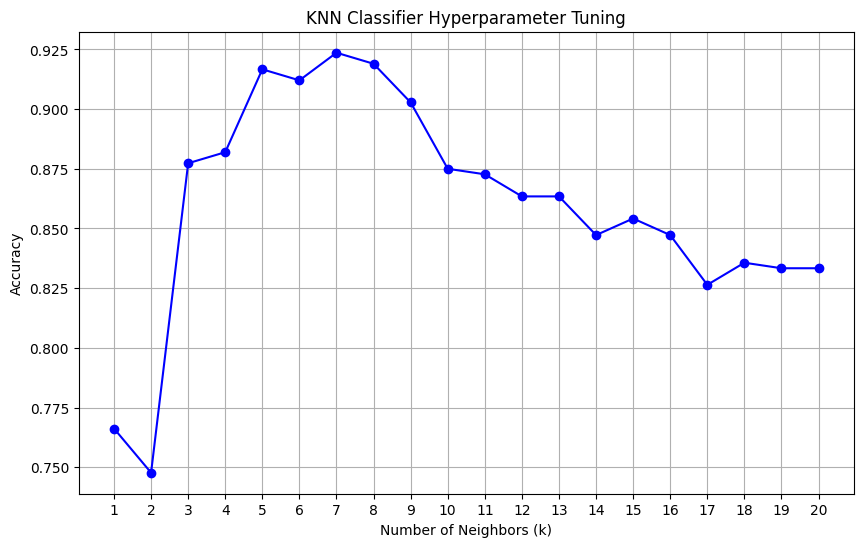

In [ ]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

k_values = range(1, 21)
accuracy_scores = []

for k in k_values:
    model = KNNClassifier(k=k)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-', color='b')
plt.title('KNN Classifier Hyperparameter Tuning')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid()
plt.show()

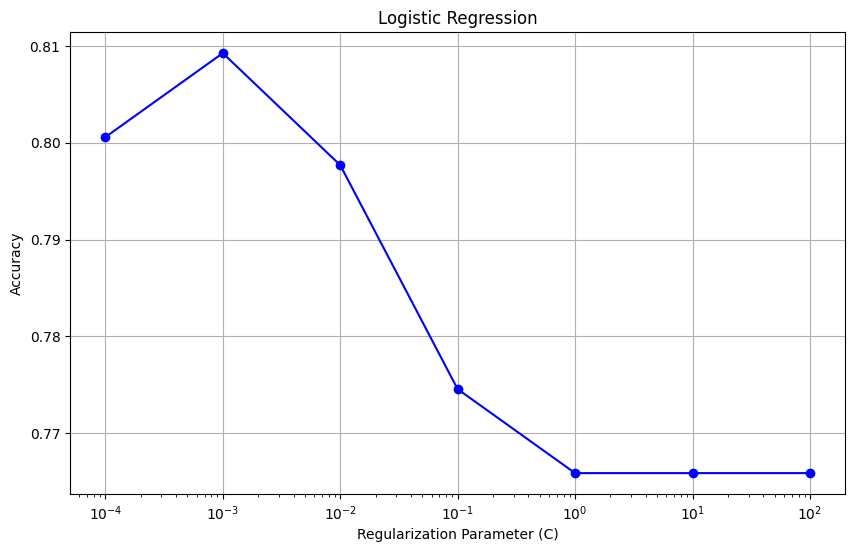

In [ ]:
C_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
accuracy_scores_log_reg = []

for C in C_values:
    log_reg = LogisticRegressionCustom(learning_rate=C, n_iterations=1000)
    log_reg.fit(x_train, y_train)
    y_pred = log_reg.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores_log_reg.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(C_values, accuracy_scores_log_reg, marker='o', linestyle='-', color='b')
plt.title('Logistic Regression')
plt.xlabel('Regularization Parameter (C)')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.grid()
plt.show()


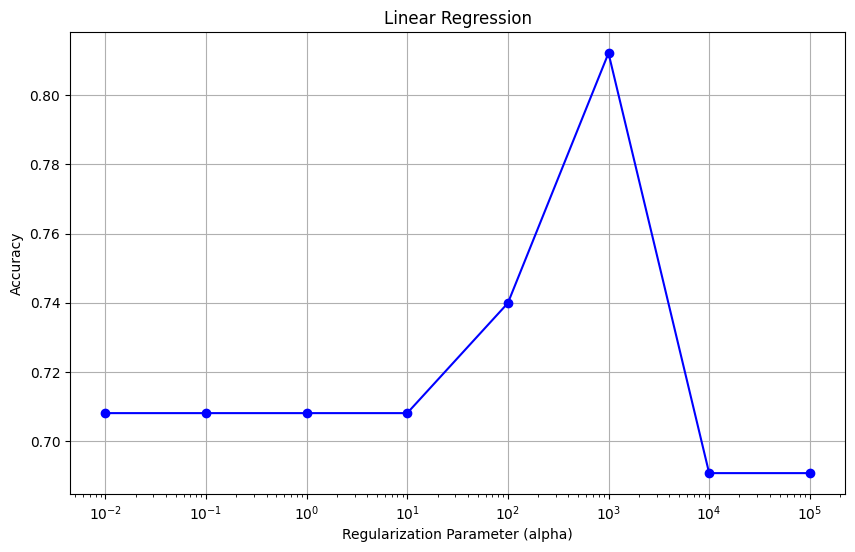

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import numpy as np

alpha_values = [0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]
accuracy_scores_lin_reg = []

for alpha in alpha_values:
    lin_reg = LinearRegressionCustom(alpha=alpha)
    lin_reg.fit(x_train, y_train)
    y_pred = lin_reg.predict(x_test)
    y_pred_class = np.rint(y_pred).astype(int)
    accuracy = accuracy_score(y_test, y_pred_class)
    accuracy_scores_lin_reg.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(alpha_values, accuracy_scores_lin_reg, marker='o', linestyle='-', color='b')
plt.title('Linear Regression')
plt.xlabel('Regularization Parameter (alpha)')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.grid()
plt.show()

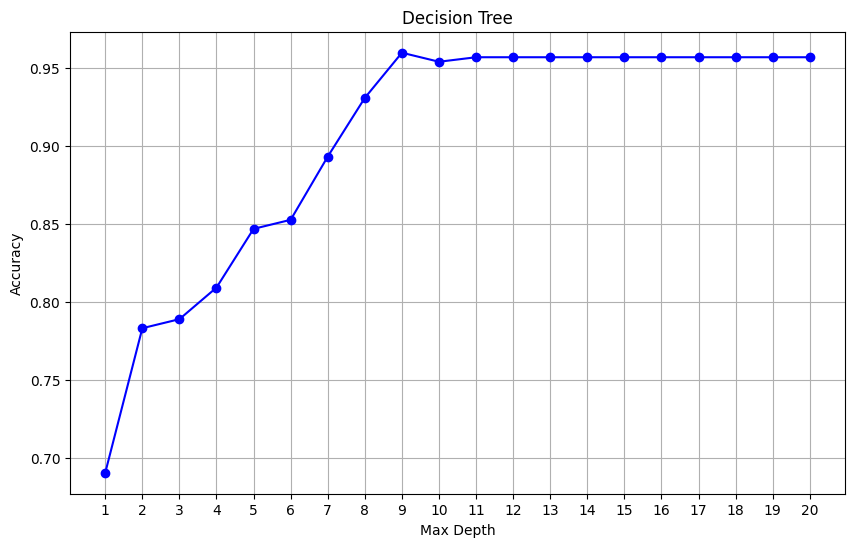

In [ ]:
max_depth_values = range(1, 21)
accuracy_scores_tree = []

for max_depth in max_depth_values:
    tree = DecisionTreeCustom(max_depth=max_depth)
    tree.fit(x_train.values, y_train.values)
    y_pred = tree.predict(x_test.values)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores_tree.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, accuracy_scores_tree, marker='o', linestyle='-', color='b')
plt.title('Decision Tree')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.xticks(max_depth_values)
plt.grid()
plt.show()

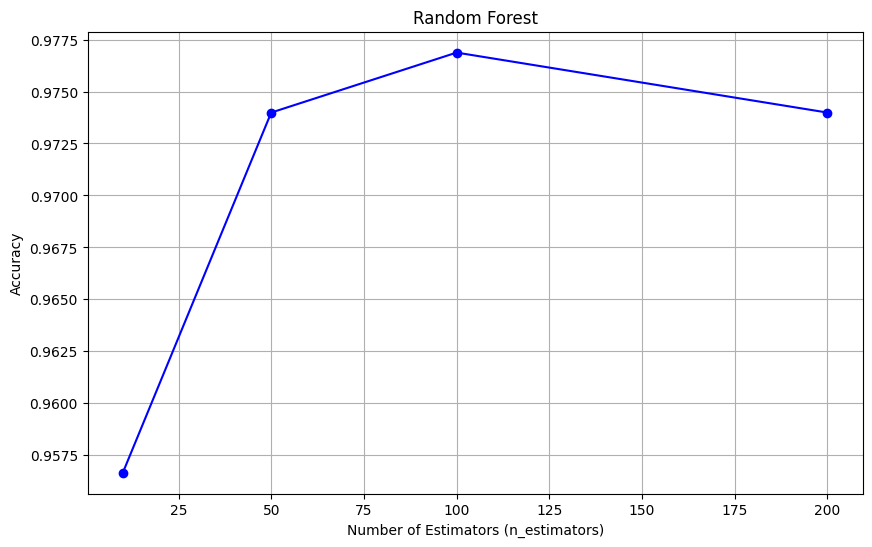

In [ ]:
n_estimators_values = [10, 50, 100, 200]
accuracy_scores_forest = []

for n_estimators in n_estimators_values:
    forest = RandomForestCustom(n_estimators=n_estimators)
    forest.fit(x_train.values, y_train.values)
    y_pred = forest.predict(x_test.values)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores_forest.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, accuracy_scores_forest, marker='o', linestyle='-', color='b')
plt.title('Random Forest')
plt.xlabel('Number of Estimators (n_estimators)')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

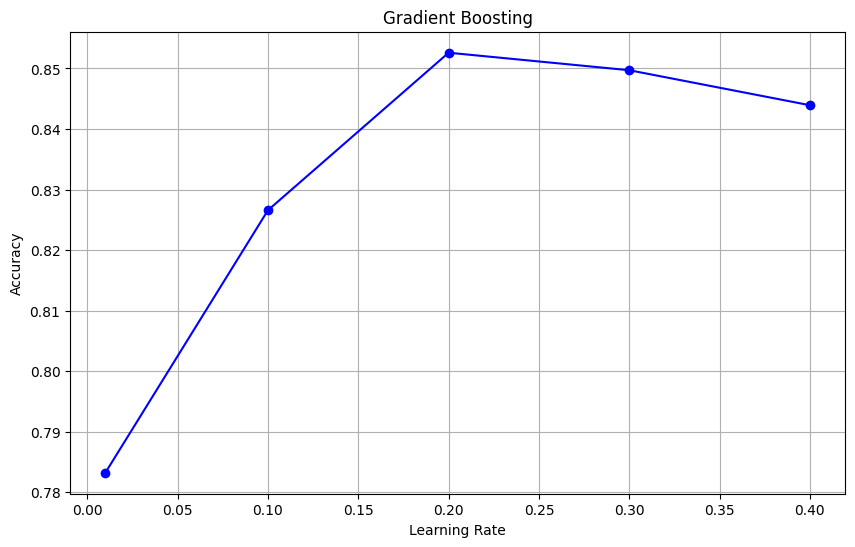

In [ ]:
learning_rate_values = [0.01, 0.1, 0.2, 0.3, 0.4]
accuracy_scores_gbc = []

for learning_rate in learning_rate_values:
    gbc = GradientBoostingCustom(learning_rate=learning_rate, n_estimators=100)
    gbc.fit(x_train.values, y_train.values)
    y_pred = gbc.predict(x_test.values)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores_gbc.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(learning_rate_values, accuracy_scores_gbc, marker='o', linestyle='-', color='b')
plt.title('Gradient Boosting')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [ ]:
models = [
    KNNClassifier(k=7),
    LogisticRegressionCustom(learning_rate=0.001, n_iterations=1000),
    LinearRegressionCustom(alpha=1000),
    DecisionTreeCustom(max_depth=9),
    RandomForestCustom(n_estimators=100),
    GradientBoostingCustom(learning_rate=0.2)
]

for model in models:
    evaluate_model(model, x_train, y_train, x_test, y_test)

KNNClassifier:
  Training Accuracy: 0.9239681390296887
  Testing Accuracy: 0.8728323699421965
  F1-score: 0.8637296999724745

LogisticRegressionCustom:
  Training Accuracy: 0.8182476466328747
  Testing Accuracy: 0.8092485549132948
  F1-score: 0.7738008285786597

LinearRegressionCustom:
  Training Accuracy: 0.8479362780593772
  Testing Accuracy: 0.8121387283236994
  F1-score: 0.7867963486052919

DecisionTreeCustom:
  Training Accuracy: 0.9732078204199855
  Testing Accuracy: 0.9595375722543352
  F1-score: 0.9601355703868134

RandomForestCustom:
  Training Accuracy: 1.0
  Testing Accuracy: 0.9739884393063584
  F1-score: 0.9742907105810428

GradientBoostingCustom:
  Training Accuracy: 0.8667632150615496
  Testing Accuracy: 0.8526011560693642
  F1-score: 0.8257818840777956



**Вывод: улучшение бейзлайна повысило точность всех имплементированных моделей**

# Регрессия

Для задачи регрессии был выбран Used Cars Dataset, так как он имеет необходимые данные для проведения исследований и может быть использован при разработке платформ для продажи автомобилей. Ссылка на датасет: https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data

Для задачи регрессии выбраны следующие метрики:


*   **Mean Squared Error (MSE)** - метрическая оценка, которая штрафует крупные ошибки, делая её полезной для задач, где важно минимизировать большие отклонения в предсказаниях.
*   **R² (Коэффициент детерминации)** - позволяет понять, насколько хорошо модель объясняет изменчивость данных,


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import warnings

warnings.simplefilter(action='ignore')

data_regression = pd.read_csv("vehicles.csv")
data_regression.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
x=data_regression.drop('selling_price',axis=1)
x_dummy=pd.get_dummies(x).astype('int')
y=data_regression['selling_price']

x_train, x_test, y_train, y_test = train_test_split(x_dummy, y, test_size = 0.2, random_state = 0)

In [ ]:
def print_metrics(model_name, model, x_train, y_train, x_test, y_test, y_pred):
    print(f"{model_name}:")
    print(f"  Training R2: {model.score(x_train, y_train):.6f}")
    print(f"  Testing R2: {r2_score(y_test, y_pred):.6f}")
    print(f"  Mean Squared Error: {mean_squared_error(y_test, y_pred):.6f}")
    print()

In [ ]:
models = {
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=5),
    "Linear Regression": Ridge(),
    "Decision Tree": DecisionTreeRegressor(random_state=1),
    "Random Forest": RandomForestRegressor(random_state=1, n_estimators=100),
    "Gradient Boosting": GradientBoostingRegressor(random_state=1)
}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print_metrics(name, model, x_train, y_train, x_test, y_test, y_pred)

K-Nearest Neighbors:
  Training R2: 0.926346
  Testing R2: 0.589127
  Mean Squared Error: 124394340912.503464

Linear Regression:
  Training R2: 0.449065
  Testing R2: 0.502250
  Mean Squared Error: 150696663046.292145

Decision Tree:
  Training R2: 0.772094
  Testing R2: 0.711365
  Mean Squared Error: 87385998914.344574

Random Forest:
  Training R2: 0.916283
  Testing R2: 0.792813
  Mean Squared Error: 62727199209.626671

Gradient Boosting:
  Training R2: 0.822212
  Testing R2: 0.696458
  Mean Squared Error: 91899194340.818939



### Улучшение бейзлайна
Выполним:
*   препроцессинг данных
*   визуализацию данных
*   формирование новых признаков
*   подбор гиперпараметров

In [ ]:
data_regression.shape

(4340, 8)

In [ ]:
data_regression.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [ ]:
data_regression.isna().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0


In [ ]:
data_regression['age'] = 2024 - data_regression['year']
data_regression.drop('year',axis=1,inplace = True)

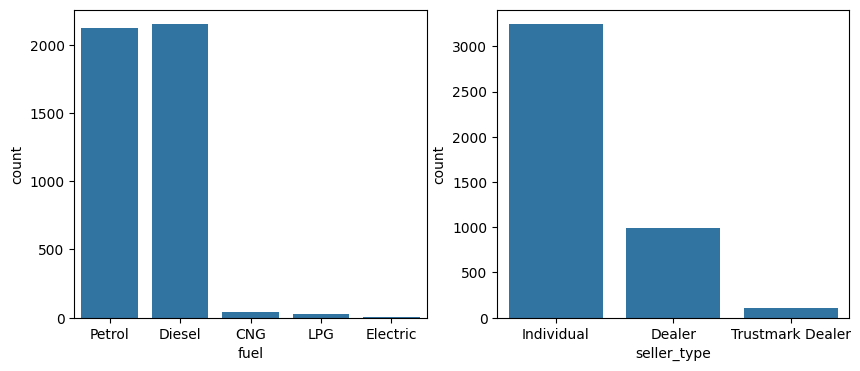

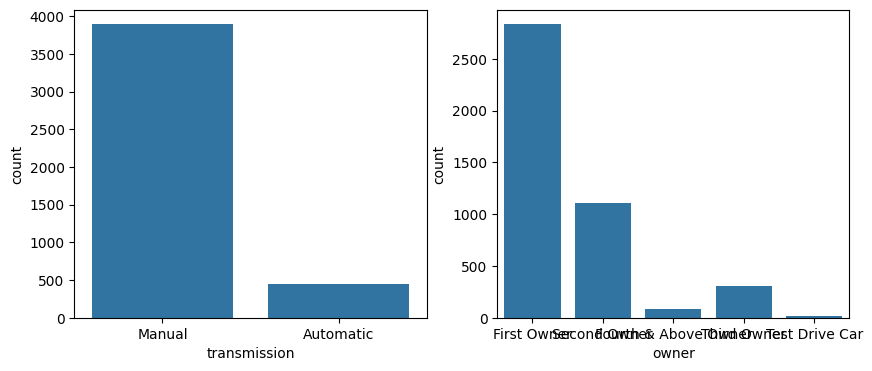

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cat_cols = ['fuel','seller_type','transmission','owner']
i=0
while i < 4:
    fig = plt.figure(figsize=[10,4])

    plt.subplot(1,2,1)
    sns.countplot(x=cat_cols[i], data=data_regression)
    i += 1

    plt.subplot(1,2,2)
    sns.countplot(x=cat_cols[i], data=data_regression)
    i += 1

    plt.show()

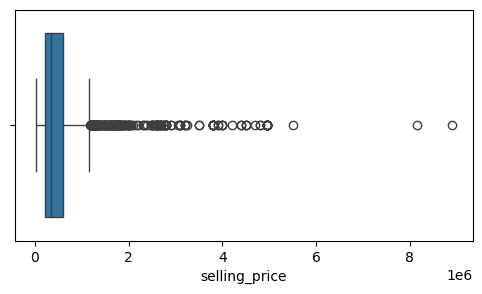

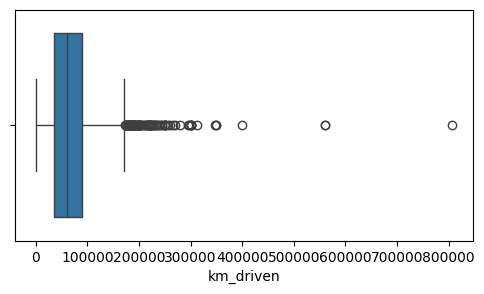

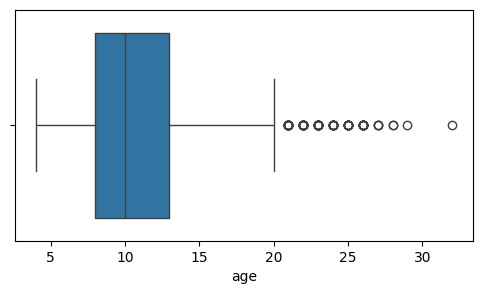

In [ ]:
num_cols = ['selling_price','km_driven','age']
i=0
while i < 3:
    fig = plt.figure(figsize=[13,3])

    plt.subplot(1,2,1)
    sns.boxplot(x=num_cols[i], data=data_regression)
    i += 1

    plt.show()

In [ ]:
data_regression.drop(labels='name',axis= 1, inplace = True)
data_regression = pd.get_dummies(data = data_regression,drop_first=True)

In [ ]:
y = data_regression['selling_price']
x = data_regression.drop('selling_price',axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

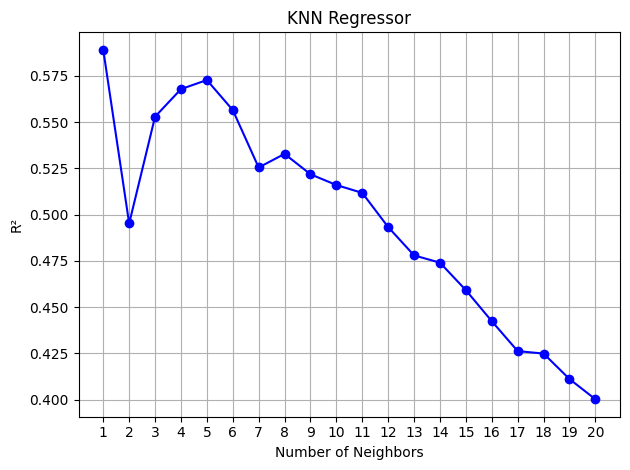

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

k_values = range(1, 21)
r2_scores = []

for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)


plt.plot(k_values, r2_scores, marker='o', linestyle='-', color='b')
plt.title('KNN Regressor')
plt.xlabel('Number of Neighbors')
plt.ylabel('R²')
plt.xticks(k_values)
plt.grid()

plt.tight_layout()
plt.show()

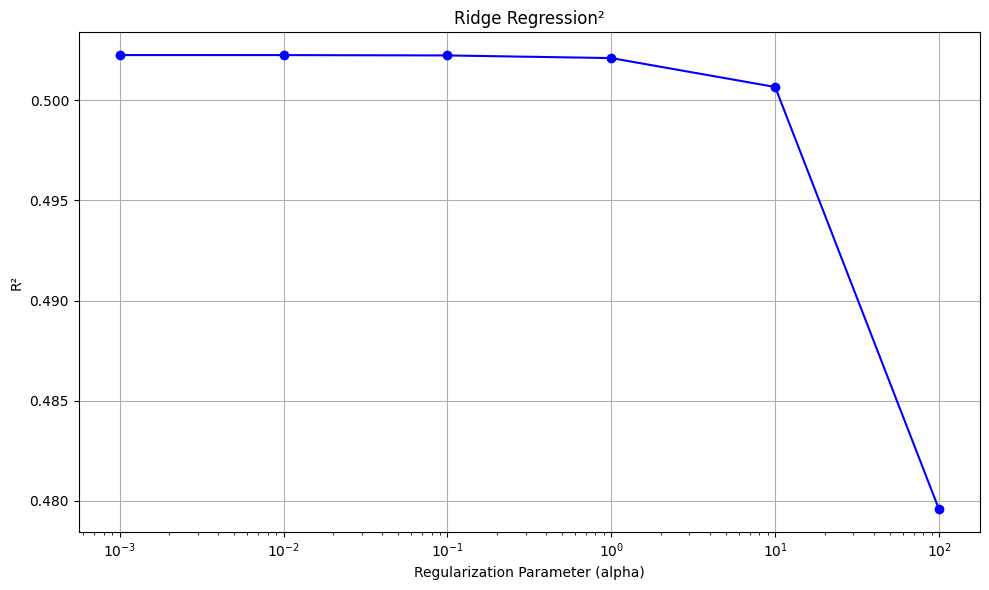

In [ ]:
from sklearn.linear_model import Ridge

alpha_values = [0.001, 0.01, 0.1, 1, 10, 100]

r2_scores = []

for alpha in alpha_values:
    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(x_train, y_train)
    y_pred = ridge_reg.predict(x_test)

    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

plt.figure(figsize=(10, 6))

plt.plot(alpha_values, r2_scores, marker='o', linestyle='-', color='b')
plt.title('Ridge Regression²')
plt.xlabel('Regularization Parameter (alpha)')
plt.ylabel('R²')
plt.xscale('log')
plt.grid()

plt.tight_layout()
plt.show()

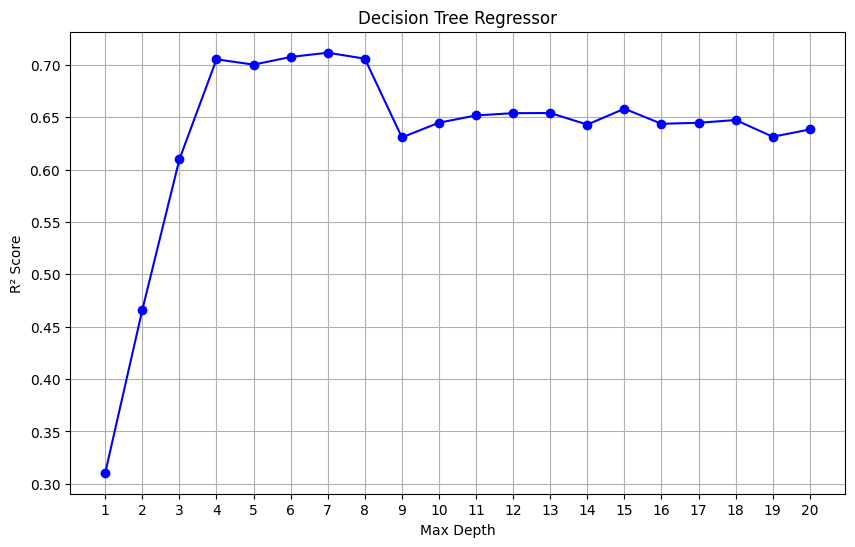

In [ ]:
max_depth_values = range(1, 21)
r2_scores_tree = []

for max_depth in max_depth_values:
    tree = DecisionTreeRegressor(max_depth=max_depth)
    tree.fit(x_train, y_train)
    y_pred = tree.predict(x_test)

    r2 = r2_score(y_test, y_pred)
    r2_scores_tree.append(r2)

plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, r2_scores_tree, marker='o', linestyle='-', color='b')
plt.title('Decision Tree Regressor')
plt.xlabel('Max Depth')
plt.ylabel('R² Score')
plt.xticks(max_depth_values)
plt.grid()
plt.show()

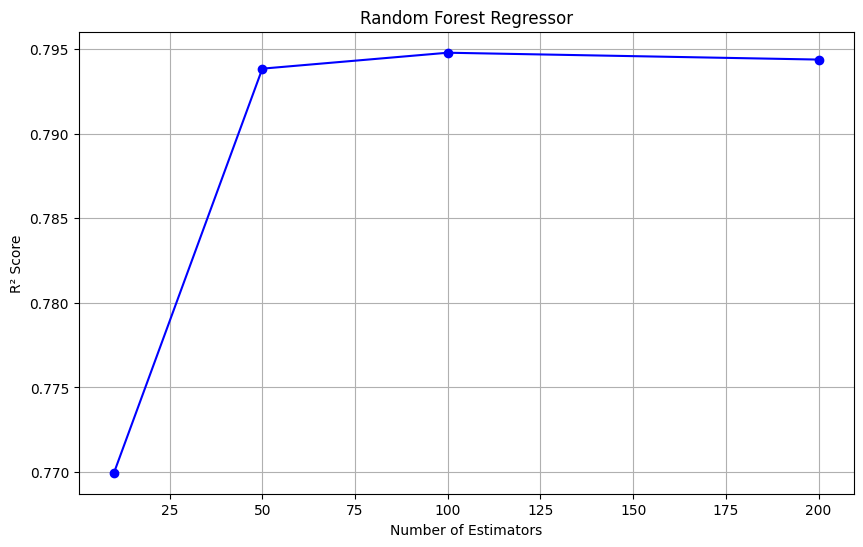

In [ ]:
n_estimators_values = [10, 50, 100, 200]
r2_scores_forest = []

for n_estimators in n_estimators_values:
    forest = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    forest.fit(x_train, y_train)
    y_pred = forest.predict(x_test)

    r2 = r2_score(y_test, y_pred)
    r2_scores_forest.append(r2)

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, r2_scores_forest, marker='o', linestyle='-', color='b')
plt.title('Random Forest Regressor')
plt.xlabel('Number of Estimators')
plt.ylabel('R² Score')
plt.grid()
plt.show()

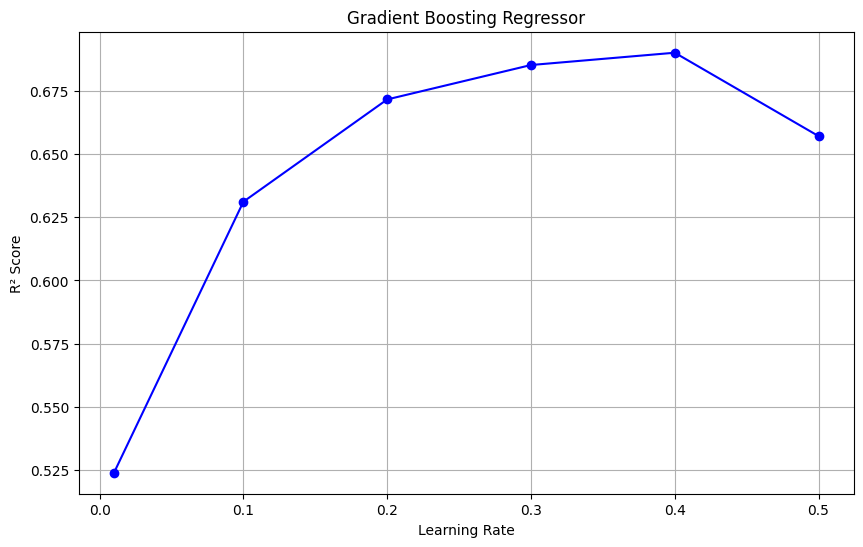

In [ ]:
learning_rate_values = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5]
r2_scores_gbc = []

for learning_rate in learning_rate_values:
    gbc = GradientBoostingRegressor(learning_rate=learning_rate, n_estimators=100, random_state=42)
    gbc.fit(x_train, y_train)
    y_pred = gbc.predict(x_test)

    r2 = r2_score(y_test, y_pred)
    r2_scores_gbc.append(r2)

plt.figure(figsize=(10, 6))
plt.plot(learning_rate_values, r2_scores_gbc, marker='o', linestyle='-', color='b')
plt.title('Gradient Boosting Regressor')
plt.xlabel('Learning Rate')
plt.ylabel('R² Score')
plt.grid()
plt.show()

In [ ]:
models = {
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=1),
    "Linear Regression": Ridge(alpha=0.01),
    "Decision Tree": DecisionTreeRegressor(random_state=1, max_depth=7),
    "Random Forest": RandomForestRegressor(random_state=1, n_estimators=100),
    "Gradient Boosting": GradientBoostingRegressor(random_state=1, learning_rate=0.4)
}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print_metrics(name, model, x_train, y_train, x_test, y_test, y_pred)

K-Nearest Neighbors:
  Training R2: 0.591105
  Testing R2: 0.591984
  Mean Squared Error: 151517078303.667450

Linear Regression:
  Training R2: 0.905757
  Testing R2: 0.864627
  Mean Squared Error: 50271062423.483002

Decision Tree:
  Training R2: 0.999891
  Testing R2: 0.619319
  Mean Squared Error: 141366275311.897583

Random Forest:
  Training R2: 0.955806
  Testing R2: 0.818482
  Mean Squared Error: 67407011465.747528

Gradient Boosting:
  Training R2: 0.838101
  Testing R2: 0.782312
  Mean Squared Error: 80838538592.402832



**Вывод: улучшение бейзлайна позволило повысить точность всех моделей, кроме случайного леса**

### Имплементация алгоритмов
Кроме визуализации данных, выполним те же действия, что и при улучшении бейзлайна для моделей из sklearn

In [ ]:
data_regression = pd.read_csv("vehicles.csv")
data_regression.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
data_regression_reduced = data_regression.sample(frac=0.25, random_state=42)

In [ ]:
x=data_regression.drop('selling_price',axis=1)
x_dummy=pd.get_dummies(x).astype('int')
y=data_regression['selling_price']

x_train, x_test, y_train, y_test = train_test_split(x_dummy, y, test_size = 0.2, random_state = 0)

In [ ]:
class KNNRegressor:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X.values
        self.y_train = y.values

    def predict(self, X):
        X_test = X.values
        predictions = []

        for x in X_test:
            distances = np.linalg.norm(self.X_train - x, axis=1)
            k_indices = np.argsort(distances)[:self.k]
            k_labels = self.y_train[k_indices]
            predictions.append(np.mean(k_labels))

        return np.array(predictions)


In [ ]:
class LinearRegressionCustom:
    def __init__(self, alpha=1.0):
        self.alpha = alpha
        self.theta = None

    def fit(self, X, y):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        m = X_b.shape[1]
        I = np.eye(m)
        I[0, 0] = 0
        self.theta = np.linalg.inv(X_b.T.dot(X_b) + self.alpha * I).dot(X_b.T).dot(y)

    def predict(self, X):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        return X_b.dot(self.theta)

In [ ]:
class DecisionTreeRegressorCustom:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X, y):
        self.tree = self._build_tree(X, y)

    def _build_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        if len(np.unique(y)) == 1:
            return np.mean(y)

        if self.max_depth is not None and depth >= self.max_depth:
            return np.mean(y)

        best_split = self._best_split(X, y)
        left_tree = self._build_tree(X[best_split['left_indices']], y[best_split['left_indices']], depth + 1)
        right_tree = self._build_tree(X[best_split['right_indices']], y[best_split['right_indices']], depth + 1)

        return {
            'feature_index': best_split['feature_index'],
            'threshold': best_split['threshold'],
            'left': left_tree,
            'right': right_tree
        }

    def _best_split(self, X, y):
        best_split = {}
        best_mse = float('inf')
        n_samples, n_features = X.shape

        for feature_index in range(n_features):
            thresholds = np.unique(X[:, feature_index])
            for threshold in thresholds:
                left_indices = np.where(X[:, feature_index] <= threshold)[0]
                right_indices = np.where(X[:, feature_index] > threshold)[0]

                if len(left_indices) == 0 or len(right_indices) == 0:
                    continue

                mse = self._mean_squared_error(y, left_indices, right_indices)
                if mse < best_mse:
                    best_mse = mse
                    best_split = {
                        'feature_index': feature_index,
                        'threshold': threshold,
                        'left_indices': left_indices,
                        'right_indices': right_indices
                    }
        return best_split

    def _mean_squared_error(self, y, left_indices, right_indices):
        left_size = len(left_indices)
        right_size = len(right_indices)
        total_size = left_size + right_size

        left_target_mean = np.mean(y[left_indices])
        right_target_mean = np.mean(y[right_indices])

        left_mse = np.mean((y[left_indices] - left_target_mean) ** 2)
        right_mse = np.mean((y[right_indices] - right_target_mean) ** 2)

        return (left_size / total_size) * left_mse + (right_size / total_size) * right_mse

    def predict(self, X):
        return np.array([self._predict_one(x, self.tree) for x in X])

    def _predict_one(self, x, tree):
        if isinstance(tree, dict):
            if x[tree['feature_index']] <= tree['threshold']:
                return self._predict_one(x, tree['left'])
            else:
                return self._predict_one(x, tree['right'])
        else:
            return tree


In [ ]:
class RandomForestRegressorCustom:
    def __init__(self, n_estimators=100, max_depth=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.trees = []

    def fit(self, X, y):
        for _ in range(self.n_estimators):
            bootstrap_indices = np.random.choice(range(X.shape[0]), size=X.shape[0], replace=True)
            X_bootstrap = X[bootstrap_indices]
            y_bootstrap = y[bootstrap_indices]

            tree = DecisionTreeRegressorCustom(max_depth=self.max_depth)
            tree.fit(X_bootstrap, y_bootstrap)
            self.trees.append(tree)

    def predict(self, X):
        tree_predictions = np.array([tree.predict(X) for tree in self.trees])
        return np.mean(tree_predictions, axis=0)


In [ ]:
class GradientBoostingRegressorCustom:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.models = []

    def fit(self, X, y):
        y_pred = np.zeros_like(y, dtype=float)

        for _ in range(self.n_estimators):
            residuals = y - y_pred
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, residuals)
            self.models.append(tree)
            predictions = tree.predict(X)

            y_pred += self.learning_rate * predictions

    def predict(self, X):
        y_pred = np.zeros(X.shape[0])

        for tree in self.models:
            y_pred += self.learning_rate * tree.predict(X)

        return y_pred

In [ ]:
models = [
    ("KNN Regressor", KNNRegressor(k=3)),
    ("Linear Regression", LinearRegressionCustom()),
    ("Decision Tree Regressor", DecisionTreeRegressorCustom(max_depth=5)),
    ("Random Forest Regressor", RandomForestRegressorCustom(n_estimators=100, max_depth=5)),
    ("Gradient Boosting Regressor", GradientBoostingRegressorCustom(n_estimators=100, learning_rate=0.1, max_depth=3))
]

for model_name, model in models:
    if isinstance(model, (DecisionTreeRegressorCustom)):
        x_train = x_train.values
        y_train = y_train.values
        x_test = x_test.values

    model.fit(x_train, y_train)

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    print_metrics(model_name, model, x_train, y_train, x_test, y_test, y_train_pred, y_test_pred)

KNN Regressor:
  Training R2: 0.712975
  Testing R2: 0.574612
  Mean Squared Error: 157968311457.116241

Linear Regression:
  Training R2: 0.905757
  Testing R2: 0.864627
  Mean Squared Error: 50271062423.825462

Decision Tree Regressor:
  Training R2: 0.742131
  Testing R2: 0.567354
  Mean Squared Error: 160663665208.615753

Random Forest Regressor:
  Training R2: 0.757169
  Testing R2: 0.738858
  Mean Squared Error: 96975472758.172699

Gradient Boosting Regressor:
  Training R2: 0.838101
  Testing R2: 0.782331
  Mean Squared Error: 80831773598.612091



### Улучшение бейзлайна

In [ ]:
data_regression['age'] = 2024 - data_regression['year']
data_regression.drop('year',axis=1,inplace = True)

In [ ]:
data_regression.drop(labels='name',axis= 1, inplace = True)
data_regression = pd.get_dummies(data = data_regression,drop_first=True)

In [ ]:
y = data_regression['selling_price']
x = data_regression.drop('selling_price',axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

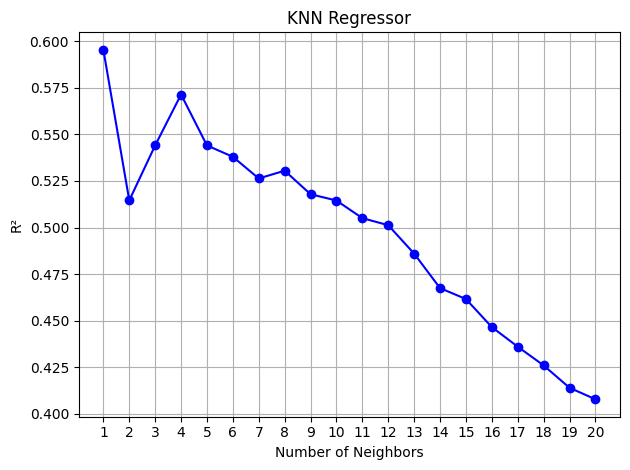

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

k_values = range(1, 21)
r2_scores = []

for k in k_values:
    model = KNNRegressor(k=k)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)


plt.plot(k_values, r2_scores, marker='o', linestyle='-', color='b')
plt.title('KNN Regressor')
plt.xlabel('Number of Neighbors')
plt.ylabel('R²')
plt.xticks(k_values)
plt.grid()

plt.tight_layout()
plt.show()

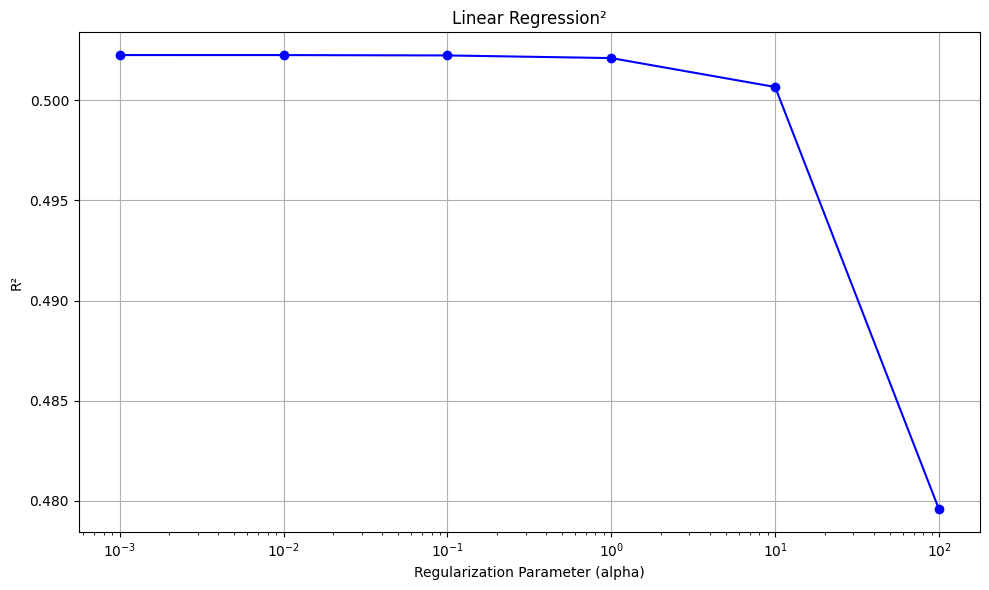

In [ ]:
alpha_values = [0.001, 0.01, 0.1, 1, 10, 100]

r2_scores = []

for alpha in alpha_values:
    lin_reg = LinearRegressionCustom(alpha=alpha)
    lin_reg.fit(x_train, y_train)
    y_pred = lin_reg.predict(x_test)

    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

plt.figure(figsize=(10, 6))

plt.plot(alpha_values, r2_scores, marker='o', linestyle='-', color='b')
plt.title('Linear Regression²')
plt.xlabel('Regularization Parameter (alpha)')
plt.ylabel('R²')
plt.xscale('log')
plt.grid()

plt.tight_layout()
plt.show()

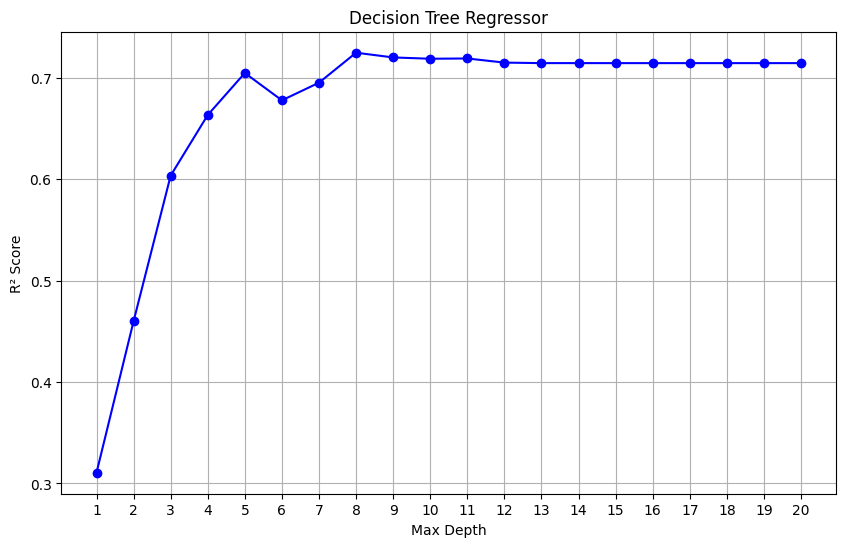

In [ ]:
max_depth_values = range(1, 21)
r2_scores_tree = []

for max_depth in max_depth_values:
    tree = DecisionTreeRegressorCustom(max_depth=max_depth)
    tree.fit(x_train.values, y_train.values)
    y_pred = tree.predict(x_test.values)

    r2 = r2_score(y_test, y_pred)
    r2_scores_tree.append(r2)

plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, r2_scores_tree, marker='o', linestyle='-', color='b')
plt.title('Decision Tree Regressor')
plt.xlabel('Max Depth')
plt.ylabel('R² Score')
plt.xticks(max_depth_values)
plt.grid()
plt.show()

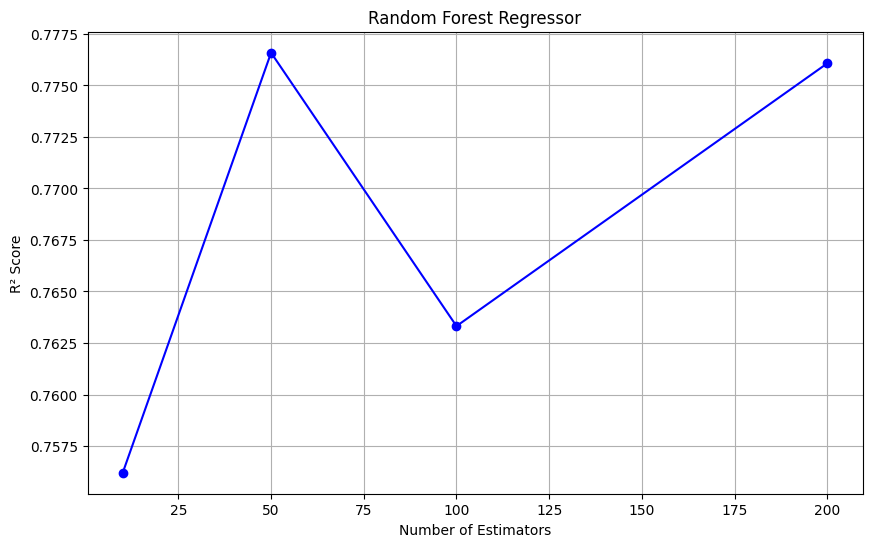

In [ ]:
n_estimators_values = [10, 50, 100, 200]
r2_scores_forest = []

for n_estimators in n_estimators_values:
    forest = RandomForestRegressorCustom(n_estimators=n_estimators)
    forest.fit(x_train.values, y_train.values)
    y_pred = forest.predict(x_test.values)

    r2 = r2_score(y_test, y_pred)
    r2_scores_forest.append(r2)

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, r2_scores_forest, marker='o', linestyle='-', color='b')
plt.title('Random Forest Regressor')
plt.xlabel('Number of Estimators')
plt.ylabel('R² Score')
plt.grid()
plt.show()

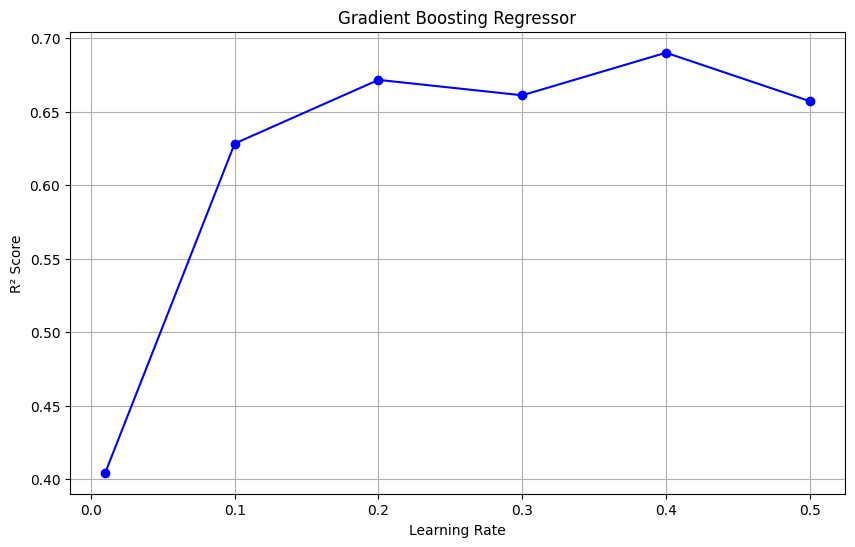

In [ ]:
learning_rate_values = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5]
r2_scores_gbc = []

for learning_rate in learning_rate_values:
    gbc =  GradientBoostingRegressorCustom(learning_rate=learning_rate, n_estimators=100)
    gbc.fit(x_train, y_train)
    y_pred = gbc.predict(x_test)

    r2 = r2_score(y_test, y_pred)
    r2_scores_gbc.append(r2)

plt.figure(figsize=(10, 6))
plt.plot(learning_rate_values, r2_scores_gbc, marker='o', linestyle='-', color='b')
plt.title('Gradient Boosting Regressor')
plt.xlabel('Learning Rate')
plt.ylabel('R² Score')
plt.grid()
plt.show()

In [ ]:
models = [
    ("KNN Regressor", KNNRegressor(k=1)),
    ("Linear Regression", LinearRegressionCustom(alpha=0.01)),
    ("Decision Tree Regressor", DecisionTreeRegressorCustom(max_depth=8)),
    ("Random Forest Regressor", RandomForestRegressorCustom(n_estimators=50)),
    ("Gradient Boosting Regressor", GradientBoostingRegressorCustom(learning_rate=0.4))
]

for model_name, model in models:
    if isinstance(model, (DecisionTreeRegressorCustom)):
        x_train = x_train.values
        y_train = y_train.values
        x_test = x_test.values

    model.fit(x_train, y_train)

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    print_metrics(model_name, model, x_train, y_train, x_test, y_test, y_train_pred, y_test_pred)

KNN Regressor:
  Training R2: 0.920162
  Testing R2: 0.595362
  Mean Squared Error: 122506594407.889404

Linear Regression:
  Training R2: 0.449065
  Testing R2: 0.502250
  Mean Squared Error: 150696663046.292542

Decision Tree Regressor:
  Training R2: 0.884402
  Testing R2: 0.724721
  Mean Squared Error: 83342472988.827637

Random Forest Regressor:
  Training R2: 0.911175
  Testing R2: 0.773095
  Mean Squared Error: 68696967056.730835

Gradient Boosting Regressor:
  Training R2: 0.822212
  Testing R2: 0.695380
  Mean Squared Error: 92225342938.183899



**Вывод: улучшение бейзлайна позволило повысить точность имплементированных моделей KNN, решающего дерево и случайного леса**